# **🗃️ Data Loading**

Useful dataset:
- [Fruits dataset](https://drive.google.com/file/d/1Jn15Qra1NldKC6ELVTTFWrqZ5OJdK5pL/view?usp=sharing)
- [Houses in Iowa](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import probplot, norm
from sklearn.metrics import mean_squared_error as mse

import warnings
warnings.filterwarnings('ignore')

## Load data and take a small look

In [ ]:
data = pd.read_csv('train.csv')

print (data.columns)
data.head()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

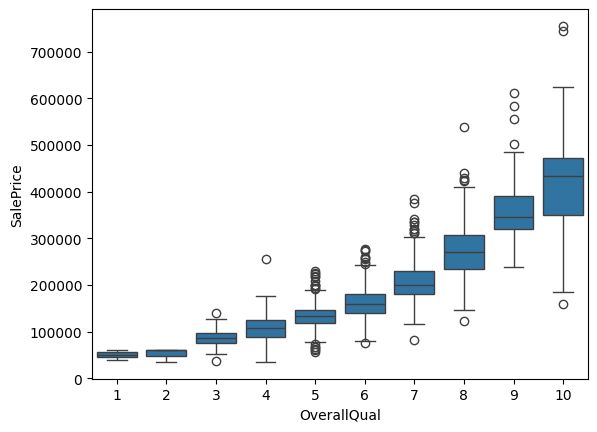

In [ ]:
# sns.scatterplot(data, x = 'OverallQual', y = 'SalePrice')
sns.boxplot(data, x = 'OverallQual', y = 'SalePrice')

## Data Cleansing

In [ ]:
num_missing = data.isnull().sum().sort_values(ascending=False)
missing_percentage = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)

num_missing.head(20)
missing = pd.concat([num_missing, missing_percentage], axis = 1, keys=['Total', 'Percentage'])
print(missing.head(20))

              Total  Percentage
PoolQC         1453    0.995205
MiscFeature    1406    0.963014
Alley          1369    0.937671
Fence          1179    0.807534
MasVnrType      872    0.597260
FireplaceQu     690    0.472603
LotFrontage     259    0.177397
GarageYrBlt      81    0.055479
GarageCond       81    0.055479
GarageType       81    0.055479
GarageFinish     81    0.055479
GarageQual       81    0.055479
BsmtFinType2     38    0.026027
BsmtExposure     38    0.026027
BsmtQual         37    0.025342
BsmtCond         37    0.025342
BsmtFinType1     37    0.025342
MasVnrArea        8    0.005479
Electrical        1    0.000685
Id                0    0.000000


In [ ]:
drop_columns = missing[ missing['Percentage']>0.15 ]
print(drop_columns)

             Total  Percentage
PoolQC        1453    0.995205
MiscFeature   1406    0.963014
Alley         1369    0.937671
Fence         1179    0.807534
MasVnrType     872    0.597260
FireplaceQu    690    0.472603
LotFrontage    259    0.177397


In [ ]:
data_cl = data.drop(data[(missing[ missing['Percentage']>0.15 ]).index], axis=1 )
data_cl.isnull().sum().sort_values(ascending=False).head(20)
# data_cl.head(10)

,0
GarageType,81
GarageCond,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81
BsmtFinType2,38
BsmtExposure,38
BsmtFinType1,37
BsmtCond,37
BsmtQual,37


In [ ]:
data_cl.isnull().sum().sort_values(ascending=False).keys().tolist()

['GarageType',
 'GarageCond',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'Electrical',
 'WoodDeckSF',
 'PavedDrive',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'SaleCondition',
 'BedroomAbvGr',
 'SaleType',
 'YrSold',
 'MoSold',
 'MiscVal',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'PoolArea',
 'Functional',
 'Fireplaces',
 '2ndFlrSF',
 'ScreenPorch',
 '3SsnPorch',
 'GarageCars',
 'GarageArea',
 'EnclosedPorch',
 'OpenPorchSF',
 'Id',
 'HeatingQC',
 '1stFlrSF',
 'OverallCond',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'YearBuilt',
 'CentralAir',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtFinSF1',
 

In [ ]:
for col in data_cl.isnull().sum().sort_values(ascending=False).keys().tolist():
  data_cl = data_cl.drop(data_cl.loc[data_cl[col].isnull()].index)
  print(col)

data_cl.isnull().sum().sort_values(ascending=False).min()
print (len(data_cl))

GarageType
GarageCond
GarageYrBlt
GarageFinish
GarageQual
BsmtFinType2
BsmtExposure
BsmtFinType1
BsmtCond
BsmtQual
MasVnrArea
Electrical
WoodDeckSF
PavedDrive
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
SaleCondition
BedroomAbvGr
SaleType
YrSold
MoSold
MiscVal
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
PoolArea
Functional
Fireplaces
2ndFlrSF
ScreenPorch
3SsnPorch
GarageCars
GarageArea
EnclosedPorch
OpenPorchSF
Id
HeatingQC
1stFlrSF
OverallCond
MSZoning
LotArea
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
YearBuilt
CentralAir
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
MSSubClass
SalePrice
1338


## Outliers

In [ ]:
data_cl.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'

In [ ]:
scaled_data_cl = StandardScaler().fit_transform(data_cl['SalePrice'].values.reshape(-1,1))

lower_bound = scaled_data_cl[scaled_data_cl[:, 0].argsort()][:10]
upper_bound = scaled_data_cl[scaled_data_cl[:, 0].argsort()][-10:]
print(lower_bound, upper_bound)

[[-1.91990905]
 [-1.8604676 ]
 [-1.65772778]
 [-1.62594708]
 [-1.6069319 ]
 [-1.6069319 ]
 [-1.57672312]
 [-1.54988636]
 [-1.52453279]
 [-1.5181944 ]] [[3.78070184]
 [3.99414088]
 [4.45257146]
 [4.66807681]
 [4.68811881]
 [5.02217745]
 [5.38630543]
 [5.55545178]
 [7.07666601]
 [7.20343387]]


<Axes: xlabel='SalePrice', ylabel='Count'>

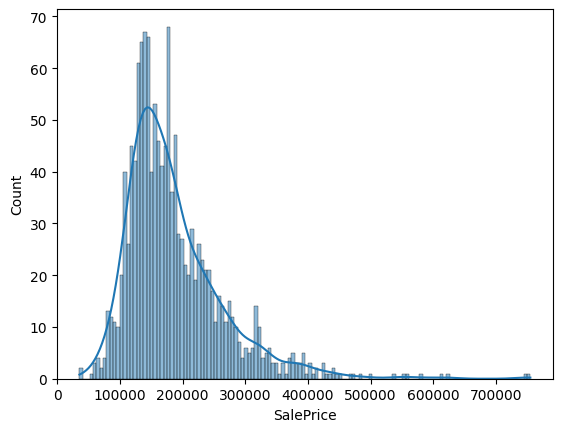

In [ ]:
sns.histplot(data_cl, x= 'SalePrice', kde=True, bins=len(np.arange(0,len(data_cl),10)))

## Normality test

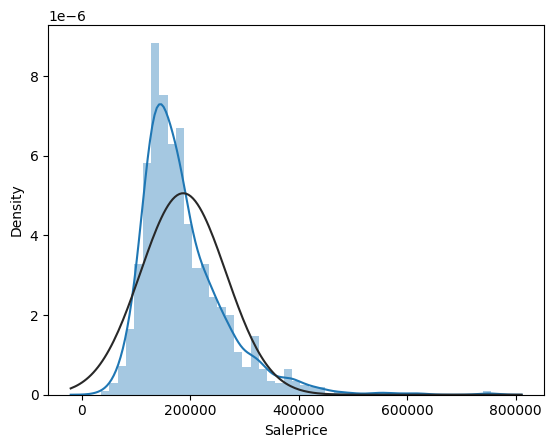

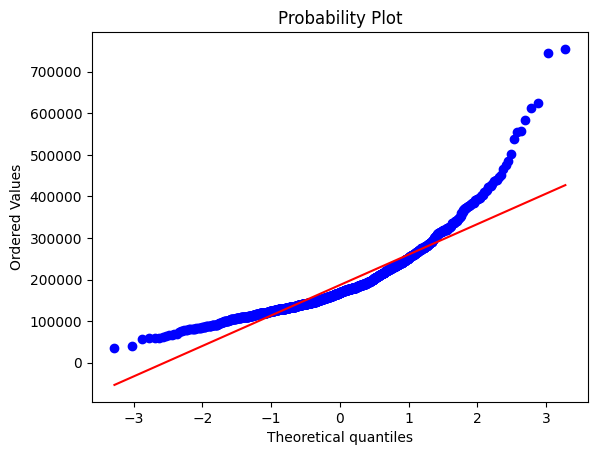

In [ ]:
sns.distplot(data_cl['SalePrice'], fit = norm);
fig = plt.figure()
res = probplot(data_cl['SalePrice'], plot = plt)

In [ ]:
data_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1338 non-null   int64  
 1   MSSubClass     1338 non-null   int64  
 2   MSZoning       1338 non-null   object 
 3   LotArea        1338 non-null   int64  
 4   Street         1338 non-null   object 
 5   LotShape       1338 non-null   object 
 6   LandContour    1338 non-null   object 
 7   Utilities      1338 non-null   object 
 8   LotConfig      1338 non-null   object 
 9   LandSlope      1338 non-null   object 
 10  Neighborhood   1338 non-null   object 
 11  Condition1     1338 non-null   object 
 12  Condition2     1338 non-null   object 
 13  BldgType       1338 non-null   object 
 14  HouseStyle     1338 non-null   object 
 15  OverallQual    1338 non-null   int64  
 16  OverallCond    1338 non-null   int64  
 17  YearBuilt      1338 non-null   int64  
 18  YearRemodAdd 

In [ ]:
data_cl = data_cl.select_dtypes(include = ['float64', 'int64'])
data_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1338 non-null   int64  
 1   MSSubClass     1338 non-null   int64  
 2   LotArea        1338 non-null   int64  
 3   OverallQual    1338 non-null   int64  
 4   OverallCond    1338 non-null   int64  
 5   YearBuilt      1338 non-null   int64  
 6   YearRemodAdd   1338 non-null   int64  
 7   MasVnrArea     1338 non-null   float64
 8   BsmtFinSF1     1338 non-null   int64  
 9   BsmtFinSF2     1338 non-null   int64  
 10  BsmtUnfSF      1338 non-null   int64  
 11  TotalBsmtSF    1338 non-null   int64  
 12  1stFlrSF       1338 non-null   int64  
 13  2ndFlrSF       1338 non-null   int64  
 14  LowQualFinSF   1338 non-null   int64  
 15  GrLivArea      1338 non-null   int64  
 16  BsmtFullBath   1338 non-null   int64  
 17  BsmtHalfBath   1338 non-null   int64  
 18  FullBath     

In [ ]:
data_cl.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
# Transformación de los datos:
data_cl_tf = data_cl.copy()

for col in data_cl.columns.tolist():
  # data_cl_tf[col] = np.log(data_cl[col])
  data_cl_tf[col].loc[data_cl_tf[col] != 0] = np.log(data_cl[col].loc[data_cl[col] != 0])
  # print (col)

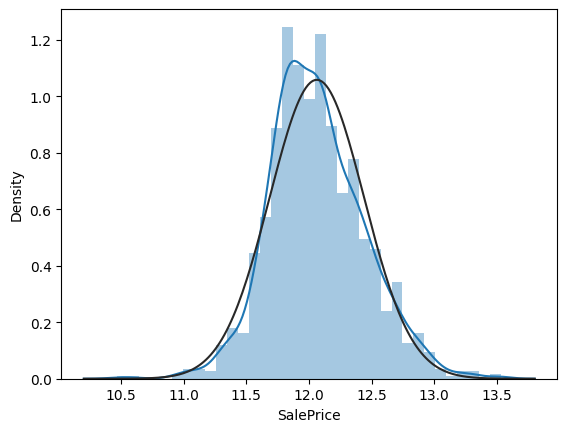

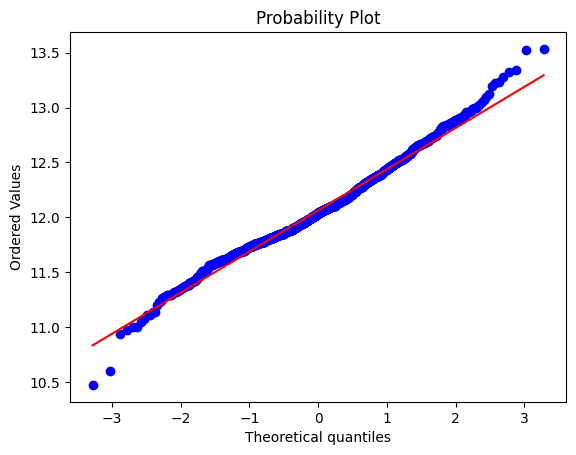

In [ ]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados:

sns.distplot(data_cl_tf['SalePrice'], fit = norm);
fig = plt.figure()
res = probplot(data_cl_tf['SalePrice'] , plot = plt)

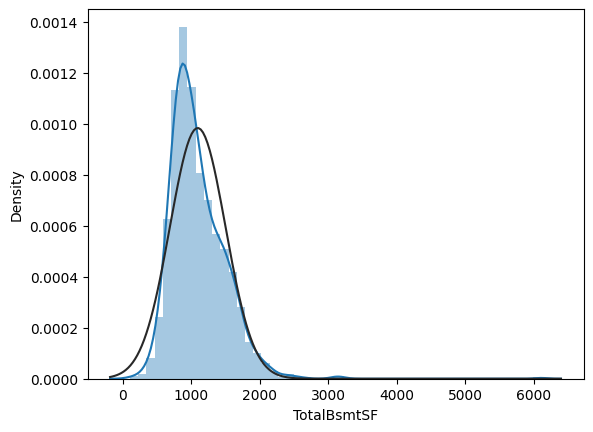

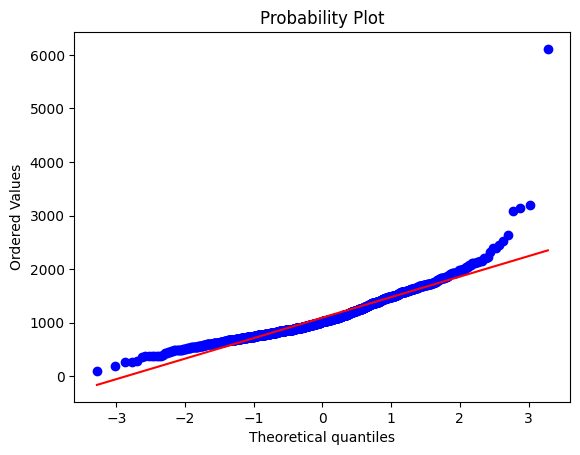

In [ ]:
sns.distplot(data_cl['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = probplot(data_cl['TotalBsmtSF'], plot = plt)

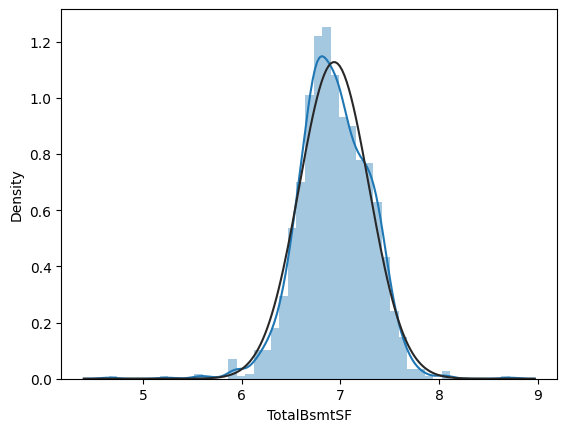

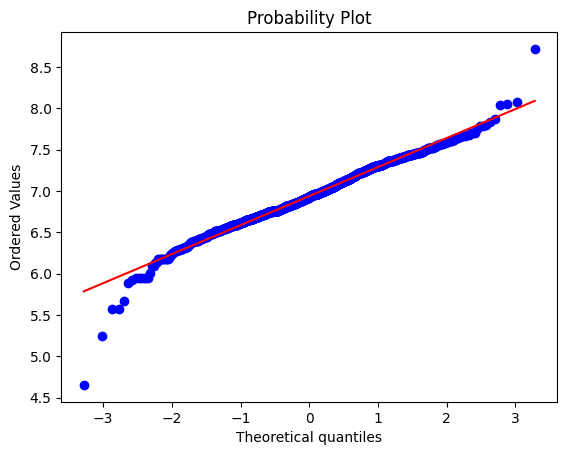

In [ ]:
sns.distplot(data_cl_tf['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = probplot(data_cl_tf['TotalBsmtSF'], plot = plt)

In [ ]:
data_cl_tf.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.000000,4.094345,9.041922,1.945910,1.609438,7.602401,7.602401,5.278115,6.559615,0.0,...,0.000000,4.110874,0.000000,0.0,0.0,0.0,0.0,0.693147,7.604894,12.247694
1,0.693147,2.995732,9.169518,1.791759,2.079442,7.588830,7.588830,0.000000,6.885510,0.0,...,5.697093,0.000000,0.000000,0.0,0.0,0.0,0.0,1.609438,7.604396,12.109011
2,1.098612,4.094345,9.328123,1.945910,1.609438,7.601402,7.601902,5.087596,6.186209,0.0,...,0.000000,3.737670,0.000000,0.0,0.0,0.0,0.0,2.197225,7.604894,12.317167
3,1.386294,4.248495,9.164296,1.945910,1.609438,7.557473,7.585789,0.000000,5.375278,0.0,...,0.000000,3.555348,5.605802,0.0,0.0,0.0,0.0,0.693147,7.603898,11.849398
4,1.609438,4.094345,9.565214,2.079442,1.609438,7.600902,7.600902,5.857933,6.484635,0.0,...,5.257495,4.430817,0.000000,0.0,0.0,0.0,0.0,2.484907,7.604894,12.429216


In [ ]:
print(np.unique(data_cl_tf['GarageCars']))
print (data_cl_tf.columns)

[0.         0.69314718 1.09861229 1.38629436]
Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [ ]:
sns.pairplot(data_cl_tf, corner=True)

In [ ]:
data_cl_tf = data_cl_tf.drop(['Id'], axis=1)

## Data Modeling

### First product - Sale price prediction

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [ ]:
print (data_cl_tf.columns)
X = np.array(data_cl_tf.iloc[:, :-1])
y = np.array(data_cl_tf.iloc[:,  -1])

print(X.shape, y.shape)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
(1338, 35) (1338,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 35) (268, 35) (1070,) (268,)


In [ ]:
gbr = GradientBoostingRegressor(n_estimators=100)
gbr.fit (X_train, y_train)

GradientBoostingRegressor()

In [ ]:
predictions = gbr.predict(X_test)
mse_score = mse(y_test, predictions)

print ("MSE: {0:.5f}".format(mse_score))

MSE: 0.01936


In [ ]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)

LinearRegression()

In [ ]:
trend = lnr.predict(X_test)
mse_score = mse(y_test, trend)

print ("MSE trend: {0:.5f}".format(mse_score))

MSE trend: 0.02113


(Text(0.5, 0, 'OverallQual'), Text(0, 0.5, 'SalePrice'))

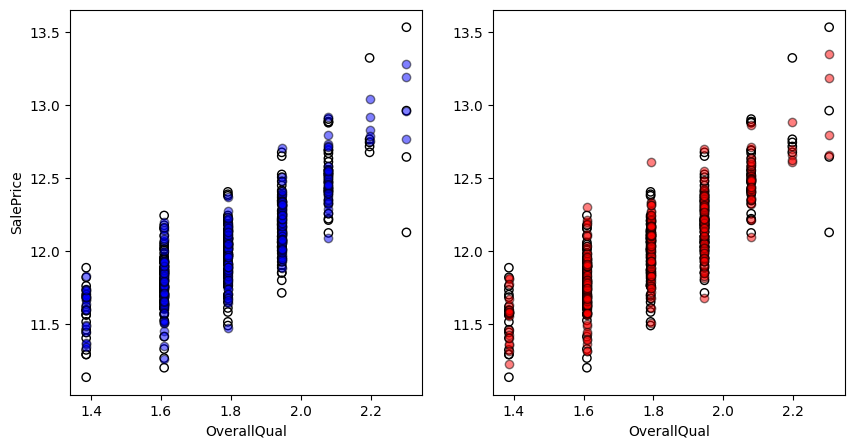

In [ ]:
_, axes = plt.subplots(1,2, figsize=(10,5))

var_idx = 2
name_var = data_cl_tf.columns[var_idx]

axes[0].scatter(X_test[:, var_idx], y_test, facecolors="none", edgecolors='k')
axes[0].scatter(X_test[:, var_idx], predictions, c='b', alpha=0.5, edgecolors='k')

axes[1].scatter(X_test[:, var_idx], y_test, facecolors="none", edgecolors='k')
axes[1].scatter(X_test[:, var_idx], trend, c='r', alpha=0.5, edgecolors='k')

axes[0].set_xlabel(name_var), axes[0].set_ylabel("SalePrice")
axes[1].set_xlabel(name_var), axes[0].set_ylabel("SalePrice")
# ax.plot(X_test[:, var_idx], trend, linestyle='--', color='gray')

(Text(0.5, 1.0, 'LRG'), Text(0.5, 1.0, 'GBR'))

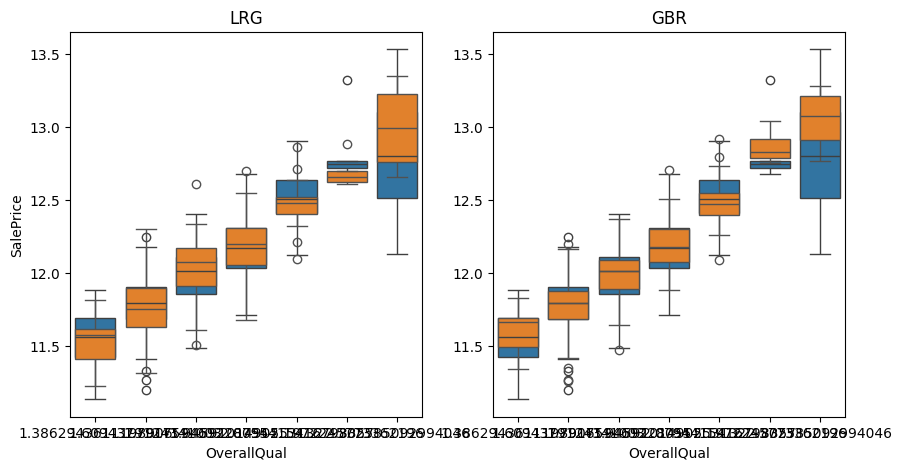

In [ ]:
_, axes = plt.subplots(1,2, figsize=(10,5))

var_idx = 2
name_var = data_cl_tf.columns[var_idx]

sns.boxplot(x=X_test[:, var_idx], y=y_test, ax=axes[0])
sns.boxplot(x=X_test[:, var_idx], y=y_test, ax=axes[1])
sns.boxplot(x=X_test[:, var_idx], y=trend, ax=axes[0])
sns.boxplot(x=X_test[:, var_idx], y=predictions, ax=axes[1])

axes[0].set_xlabel(name_var), axes[0].set_ylabel("SalePrice")
axes[1].set_xlabel(name_var), axes[0].set_ylabel("SalePrice")

axes[0].set_title("LRG"), axes[1].set_title("GBR")
# ax.plot(X_test[:, var_idx], trend, linestyle='--', color='gray')

In [ ]:
lrm = LinearRegression()
lrm.fit (X_train, y_train)

LinearRegression()

In [ ]:
predictions = lrm.predict(X_test)
mse_score = mse(y_test, predictions)

print ("MSE: {0:.5f}".format(mse_score))

MSE: 0.02113


(Text(0.5, 0, 'MSSubClass'), Text(0, 0.5, 'SalePrice'))

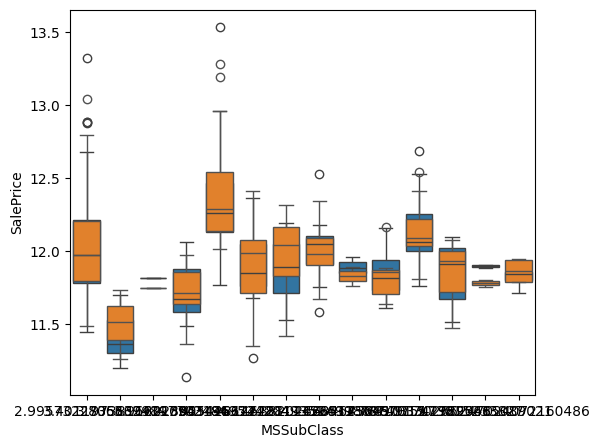

In [ ]:
_, ax = plt.subplots(1,1,figsize=(6,5))

# ax.scatter(X_test[:, 0], y_test, facecolors="none", edgecolors='k')
# ax.scatter(X_test[:, 0], predictions, alpha=0.5, edgecolors='k')

var_idx = 0
name_var = data_cl_tf.columns[var_idx]

sns.boxplot(x=X_test[:, var_idx], y=y_test, ax=ax)
sns.boxplot(x=X_test[:, var_idx], y=predictions, ax=ax)

ax.set_xlabel(name_var), ax.set_ylabel("SalePrice")



### Second product - Quality estimation

In [ ]:
data_cl_tf2 = data_cl_tf.copy()

vals = np.unique(data_cl_tf2['OverallQual'])
for i, val in enumerate(vals): data_cl_tf2['OverallQual'].replace(val, i, inplace=True)

data_cl_tf2.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,4.094345,9.041922,5.0,1.609438,7.602401,7.602401,5.278115,6.559615,0.0,5.010635,...,0.000000,4.110874,0.000000,0.0,0.0,0.0,0.0,0.693147,7.604894,12.247694
1,2.995732,9.169518,4.0,2.079442,7.588830,7.588830,0.000000,6.885510,0.0,5.648974,...,5.697093,0.000000,0.000000,0.0,0.0,0.0,0.0,1.609438,7.604396,12.109011
2,4.094345,9.328123,5.0,1.609438,7.601402,7.601902,5.087596,6.186209,0.0,6.073045,...,0.000000,3.737670,0.000000,0.0,0.0,0.0,0.0,2.197225,7.604894,12.317167
3,4.248495,9.164296,5.0,1.609438,7.557473,7.585789,0.000000,5.375278,0.0,6.291569,...,0.000000,3.555348,5.605802,0.0,0.0,0.0,0.0,0.693147,7.603898,11.849398
4,4.094345,9.565214,6.0,1.609438,7.600902,7.600902,5.857933,6.484635,0.0,6.194405,...,5.257495,4.430817,0.000000,0.0,0.0,0.0,0.0,2.484907,7.604894,12.429216


In [ ]:
print (data_cl_tf2.columns)
X = np.concatenate([data_cl_tf2.iloc[:, :2], data_cl_tf2.iloc[:, 4:-1]], axis=1)
y = np.array(data_cl_tf2.iloc[:, 2])

print(X.shape, y.shape)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
(1338, 33) (1338,)


In [ ]:
np.unique(y)

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 33) (268, 33) (1070,) (268,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

svm = SVC(kernel='rbf', gamma=0.5)
svm.fit(X_train, y_train)

SVC(gamma=0.5)

In [ ]:
p_lgr = lgr.predict(X_test)
p_knn = knn.predict(X_test)
p_svm = svm.predict(X_test)

print ("Predictions Logistic Regression")
print (classification_report(y_test, p_lgr))

print ("Predictions k-NN")
print (classification_report(y_test, p_knn))

print ("Predictions SVM")
print (classification_report(y_test, p_svm))

Predictions Logistic Regression
              precision    recall  f1-score   support

         2.0       0.40      0.11      0.17        19
         3.0       0.62      0.73      0.67        79
         4.0       0.38      0.34      0.36        70
         5.0       0.40      0.50      0.44        62
         6.0       0.38      0.31      0.34        29
         7.0       0.33      0.20      0.25         5
         8.0       0.00      0.00      0.00         4

    accuracy                           0.47       268
   macro avg       0.36      0.31      0.32       268
weighted avg       0.45      0.47      0.45       268

Predictions k-NN
              precision    recall  f1-score   support

         2.0       0.15      0.11      0.12        19
         3.0       0.48      0.62      0.54        79
         4.0       0.39      0.37      0.38        70
         5.0       0.47      0.50      0.48        62
         6.0       0.44      0.28      0.34        29
         7.0       0.33      

In [ ]:
np.unique(y_test,return_counts=True)

(array([2., 3., 4., 5., 6., 7., 8.]), array([19, 79, 70, 62, 29,  5,  4]))

In [ ]:
from sklearn.utils import resample

X_resampled, y_resampled = [], []

for i in range(len(np.unique(y_test))):
  # Upsample minority class
  Xr, yr = resample(X[y==i], y[y==i],
                  n_samples=79,    # to match majority class
                  random_state=1)  # reproducible results

  X_resampled.extend(Xr)
  y_resampled.extend(yr)

X_resampled = np.array(X_resampled)
y_resampled = np.array(y_resampled)

In [ ]:
np.unique(y_resampled,return_counts=True)


(array([0., 1., 2., 3., 4., 5., 6.]), array([79, 79, 79, 79, 79, 79, 79]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state = 1)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(442, 33) (111, 33) (442,) (111,)


In [ ]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

svm = SVC(kernel='rbf', gamma=0.01, C=10)
svm.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [ ]:
p_lgr = lgr.predict(X_test)
p_knn = knn.predict(X_test)
p_svm = svm.predict(X_test)

print ("Predictions Logistic Regression")
print (classification_report(y_test, p_lgr))

print ("Predictions k-NN")
print (classification_report(y_test, p_knn))

print ("Predictions SVM")
print (classification_report(y_test, p_svm))

Predictions Logistic Regression
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       0.69      1.00      0.82         9
         2.0       0.36      0.27      0.31        15
         3.0       0.50      0.44      0.47        18
         4.0       0.35      0.50      0.41        14
         5.0       0.69      0.39      0.50        23
         6.0       0.55      0.79      0.65        14

    accuracy                           0.59       111
   macro avg       0.59      0.63      0.59       111
weighted avg       0.61      0.59      0.58       111

Predictions k-NN
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       0.56      1.00      0.72         9
         2.0       0.41      0.47      0.44        15
         3.0       0.47      0.39      0.42        18
         4.0       0.26      0.36      0.30        14
         5.0       0.69      

(Text(0.5, 0, 'LotArea'), Text(0, 0.5, 'SalePrice'))

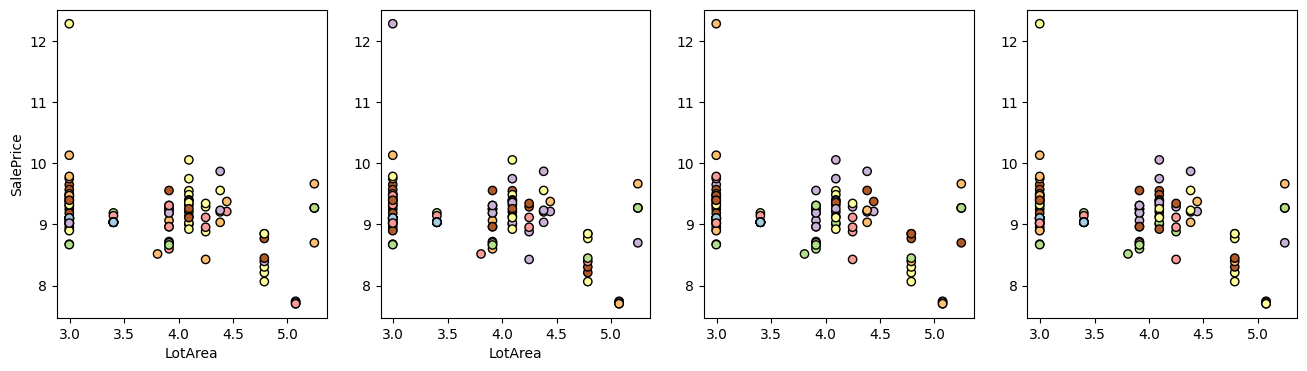

In [ ]:
_, axes = plt.subplots(1,4, figsize=(16,4))

var_idx = 1
name_var = data_cl_tf.columns[var_idx]

axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap='Paired')
axes[1].scatter(X_test[:, 0], X_test[:, 1], c=p_lgr, edgecolors='k', cmap='Paired')
axes[2].scatter(X_test[:, 0], X_test[:, 1], c=p_knn, edgecolors='k', cmap='Paired')
axes[3].scatter(X_test[:, 0], X_test[:, 1], c=p_svm, edgecolors='k', cmap='Paired')


axes[0].set_xlabel(name_var), axes[0].set_ylabel("SalePrice")
axes[1].set_xlabel(name_var), axes[0].set_ylabel("SalePrice")
# ax.plot(X_test[:, var_idx], trend, linestyle='--', color='gray')

## Other task


Done! ✅ 



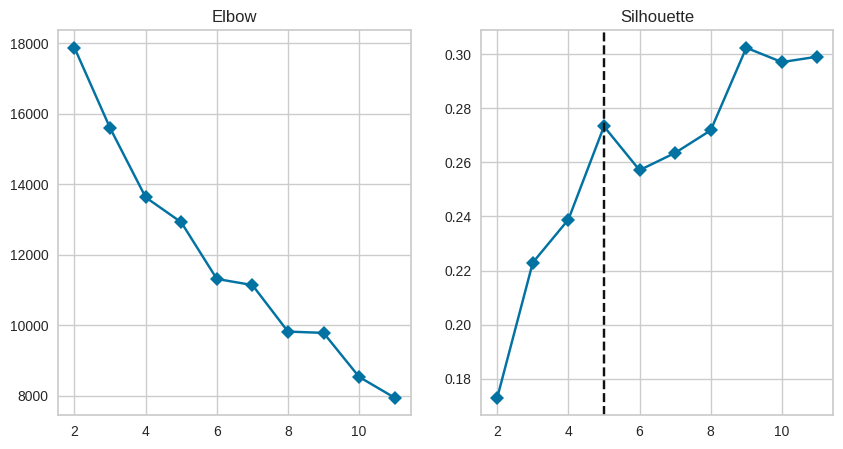

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


_, axes = plt.subplots (1,2, figsize = (10,5))

# Instantiate the clustering model and visualizer
model = KMeans()
elbow_vis = KElbowVisualizer(model, k=(2,12), ax=axes[0], metric='distortion', timings=False)
elbow_vis.fit(X_train)

sil_vis   = KElbowVisualizer(model, k=(2,12), ax=axes[1], metric='silhouette', timings=False)
sil_vis.fit(X_train)


# Plot the silhouette

# axes[0].plot( clusters , elbow_distances , marker="x")
axes[0].set_title("Elbow")

# axes[1].plot( clusters , silhouette_distances , marker="x")
axes[1].set_title("Silhouette")

# Plot the elbow
print ("\nDone! ✅ \n")



In [ ]:
n_cluster = 5

kms = KMeans(n_clusters=n_cluster, random_state=random_state)
kms.fit(X_train)

centroids = kms.cluster_centers_
predictions = kms.predict( X_test )

(Text(0.5, 0, 'OverallQual'), Text(0, 0.5, 'SalePrice'))

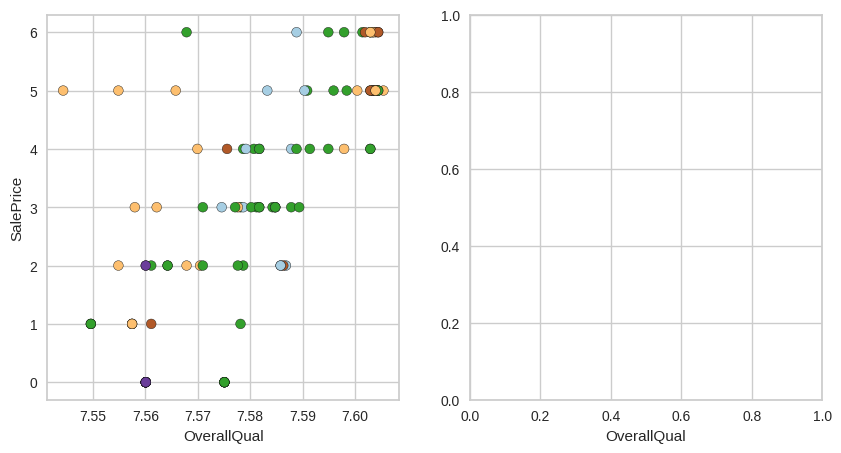

In [ ]:
_, axes = plt.subplots(1,2, figsize=(10,5))

var_idx = 2
name_var = data_cl_tf.columns[var_idx]

axes[0].scatter(X_test[:, var_idx], y_test, c=predictions, cmap='Paired', edgecolors='k')


axes[0].set_xlabel(name_var), axes[0].set_ylabel("SalePrice")
axes[1].set_xlabel(name_var), axes[0].set_ylabel("SalePrice")